# 지도 학습

지도 학습은 정답(레이블 label)을 컴퓨터에 미리 알려주고 데이터를 학습시키는 방법입니다. 지도 학습에는 분류와 회귀가 있습니다.  
분류는 주어진 데이터를 범주에 따라 분류하고, 회귀는 데이터들의 특성을 기준으로 연속된 값을 그래프로 표현하여 패턴이나 트랜드를 예측할 때 사용합니다.

## K-최근접 이웃

* 목적 : 적정한 K 값에 대한 예측
* 주어진 데이터에 대한 분류를 위해 사용
* K-최근접 이웃은 직관적이며 사용하기 쉽기 때문에 초보자가 쓰면 좋습니다. 또한, 훈련 데이터를 충분히 확보할 수 있는 환경에서 사용하면 좋습니다.

K-최근접 이웃은 새로운 입력을 받았을 때 기존 클러스터에 할당하는 분류 알고리즘입니다. 즉, 과거 데이터를 사용하여 미리 분류 모양을 만드는 것이 아니라, 과거 데이터를 저장해 두고 필요할 때마다 비교를 수행하는 방식입니다. 따라서 K 값의 선택에 따라 새로운 데이터에 대한 분류 결과가 달라질 수 있음에 유의해야 합니다.   
** 참고로 머신러닝 코드는 심층 신경망이 필요하지 않기 때문에 사이킷런(scikit-learn)을 이용합니다.

### 라이브러리 호출 및 데이터 준비

먼저 필요한 라이브러리를 호출하고 데이터를 준비한다. 데이터는 내려받은 예제 파일을 data 폴더에 있는 iris.datra 파일을 사용합니다.   
iris.data 데이터 경로는 자신의 실습 환경에 맞게 수정해서 사용할 수 있습니다.

In [6]:
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-macosx_12_0_arm64.whl (8.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [7]:
import numpy as np  #벡터 및 행렬의 연산 처리를 위한 라이브러리
import matplotlib.pyplot as plt  #데이터를 차트나 플롯으로 그려 주는 라이브러리
import pandas as pd  #데이터 분석 및 조작을 위한 라이브러리
from sklearn import metrics  #모델 성능 평가

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] #데이터셋에 열 이름 할당

dataset = pd.read_csv('/Users/dahyun/Desktop/iris_data.txt', names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 훈련과 테스트셋 분리

In [9]:
X = dataset.iloc[:, :-1].values  #모든 행을 사용하지만 열(칼럼)은 뒤에서 하나를 뺀 값을 가져와서 X에 저장
y = dataset.iloc[:, 4].values  #모든 행을 사용하지만 열은 앞에서 다섯번째 값만 가져와서 y에 저장
# print(X); print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#X, y를 사용하여 훈련과 테스트 데이터셋으로 분리하며, 테스트 데이터셋의 비율은 20%만 사용

from sklearn.preprocessing import StandardScaler
s = StandardScaler()  #특성 스케일링(scaling), 평균이 0, 표준변차가 1이 되도록 변환
s.fit(X_train)  #StandardScaler를 사용하기 전에 먼저 fit() 메서드를 사용하여 훈련 데이터에 맞게 scaler를 학습시켜야 한다.
X_train = s.transform(X_train)  #훈련 데이터를 스케일링 처리
X_test = s.transform(X_test)  #테스트 데이터를 스케일링 처리
# print(X_train); print(X_test); 데이터를 확인해보면 스케일링이 잘 이루어졌음을 알 수 있다.

### 모델 생성 및 훈련

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) #k=50인 k-최근접 이웃 모델 생성
knn.fit(X_train, y_train)  #모델 훈련

KNeighborsClassifier(n_neighbors=50)

### 모델 정확도

In [11]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.8666666666666667


### 최적의 K 찾기

In [14]:
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc , "으로 최적의 k는" , k+1 , "입니다.")

정확도 0.9666666666666667 으로 최적의 k는 2 입니다.


1.1.4에서는 K의 값이 50일 때 정확도가 87%였다면 K값이 2일 때는 정확도가 97.7%로 높아졌습니다. 이와 같이 K-최근접 이웃 알고리즘은 K값에 따라 성능이 달라질 수 있으므로 초기 설정이 매우 중요합니다.

## 서포트 벡터 머신

* 주어진 데이터에 대한 분류
* 서포트 벡터 머신은 커널만 적절히 선택한다면 정확도가 상당히 좋기 때문에 정확도를 요구하는 분류 문제를 다룰 때 사용하면 좋습니다. 또한, 텍스트를 분류할 때도 많이 사용합니다.

서포트 벡터 머신은 분류를 위한 기준선을 정의하는 모델입니다. 즉, 분류되지 않은 새로운 데이터가 나타나면 결정 경계(기준선)을 기준으로 경계의 어느 쪽에 속하는지 분류하는 모델입니다. 따라서 서포트 벡터 머신에서는 결정 경계를 이해하는 것이 중요합니다.  

마진(margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미합니다. 최적의 결정 경계는 마진을 최대로 해야 합니다. 결국 이상치(outlier)를 잘 다루는 것이 중요합니다. 이때 이상치를 허용하지 않는 것을 하드 마진(hard margin)이라고 하며. 어느 정도의 이상치들이 마진 안에 포함되는 것을 허용한다면 소프트 마진(soft margin)이라고 합니다. 

### 라이브러리 호출

In [15]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
# conda install tensorflow (pip install tensorflow되지 않아서 conda install로 진행)
import tensorflow as tf
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

TF_CPP_MIN_LOG_LEVEL이라는 환경 변수를 사용하여 로깅을 제거합니다.  
(기본값은 0으로 모든 로그가 표시되며, INFO 로그를 필터링하려면 1, WARNING 로그를 필터링하려면 2, ERROR 로그를 추가로 필터링하려면 3으로 설정)

### iris 데이터를 준비하고 훈련과 테스트 데이터셋으로 분리

In [18]:
iris = datasets.load_iris()  #사이킷런에서 제공하는 iris 데이터 호출
iris #데이터 확인

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)
# 사이킷런의 model_selection 패키지에서 제공하는 train_test_split 매서드를 활용하여 훈련과 데이터셋으로 분리

### SVM 모델에 대한 정확도

먼저 사이킷런으로 SVM 모델을 생성 및 훈련시킨 후 테스트 데이터셋을 이용한 예측을 수행

In [30]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, gamma=0.5)
# C 값은 오류를 어느 정도 허용할지 지정하는 파라미터이며, C 값이 클수록 하드 마진이고 작을수록 소프트 마진입니다. 
# 감마는 결정 경계를 얼마나 유연하게 가져갈지 지정합니다. 즉, 훈련 데이터에 얼마나 민감하게 반응할지 지정하기 때문에 C와 개념이 비슷합니다.

svm.fit(X_train, y_train)  #훈련 데이터를 사용하여 SVM 분류기를 훈련
predictions = svm.predict(X_test)  #훈련된 모델을 사용하여 테스트 데이터에서 예측
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


SVM은 선형 분류와 비선형 분류를 지원합니다.   

비선형에 대한 커널은 선형으로 분류될 수 없는 데이터들 때문에 발생. 비선형 문제를 해결하는 가장 기본적인 방법은 저차원 데이터를 고차원으로 보내는 것인데, 이것은 많은 수학적 계산이 필요하기 때문에 성능에 문제를 줄 수 있습니다.

이러한 문제를 해결하고자 도입한 것이 바로 '커널 트릭'입니다. 선형 모델을 위한 커널에는 선형 커널이 있고, 비선형 커널에는 가우시안 RBF 커널과 다항식 커널이 있습니다. 
* 선형 커널: 선형으로 분류 가능한 데이터에 적용
* 다항식 커널: 실제로는 특성을 추가하지 않지만, 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있는 방법입니다. 즉, 실제로는 특성을 추가하지 않지만, 엄청난 수의 특성 조합이 생기는 것과 같은 효과를 얻기 때문에 고차원으로 데이터 매핑이 가능
* 가우시안 RBF 커널: 다항식 커널의 확장이라고 생각해도 좋다. 입력 벡터를 차원이 무한한 고차원으로 매핑하는 것으로, 모든 차수의 모든 다항식을 고려합니다. 즉, 다항식 커널은 차수에 한계가 있는데, 가우시안 RBF는 차수에 제한 없이 무한한 확장이 가능합니다.

## 결정 트리

* 주어진 데이터에 대한 분류
* 결정 트리는 이상치가 많은 값으로 구성된 데이터셋을 다룰 때 사용하면 좋습니다. 또한, 결정 과정이 시각적으로 표현되기 때문에 머신 러닝이 어떤 방식으로 의사 결정을 하는지 알고 싶을 때 유용합니다

결정 트리는 데이터를 1차로 분류한 후 각 영역의 순도는 증가하고, 불순도와 불확실성은 감소하는 방향으로 학습을 진행합니다. 순도가 증가하고 불확실성이 감소하는 것을 정보 이론에서는 정보 획득이라고 하며, 순도를 계산하는 방법에는 다음 두 가지를 많이 사용합니다.
* 엔트로피: 확률 변수의 불확실성을 수치로 나타낸 것으로, 엔트로피가 높을수록 불확실성이 높다는 의미.   
즉 엔트로피=0=불확실성 최소=순도 최대, 엔트로피=0.5=불확실성 최대=순도 최소
* 지니 계수(Gini index): 불순도를 측정하는 지표로, 데이터의 분산 정도를 정량화하여 표현한 값. 즉, 지니 계수는 원소 n개 중에서 임의로 두 개를 추출했을 때, 추출된 두 개가 서로 다른 그룹에 속해 있을 확률을 말합니다. 지니 계수는 로그를 계산할 필요가 없어 엔트로피보다 계산이 빠르기 때문에 결정 트리에서 많이 사용합니다.

### 라이브러리 호출 및 데이터 준비

In [13]:
import pandas as pd
df = pd.read_csv('/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter3/train.csv') #판다스를 이용하여 파일을 로드하여 df에 저장
print(df.head())

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 데이터 전처리

In [16]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']] #승객의 생존 여부를 예측하려고 해당 열만 추출
# print(df) #데이터 출력을 통해서 성별만 숫자 데이터가 아닌 것을 알 수 있다.
df['Sex'] = df['Sex'].map({'male':0,'female':1})  #성별을 나타내는 'sex'를 0 또는 1의 정수 값으로 변환
df = df.dropna()  #값이 없는 데이터 삭제
X = df.drop('Survived', axis=1) # x 값에서는 생존 확률 부분을 없앤다.
y = df['Survived']  #'Survived' 값을 예측 레이블로 사용

### 훈련과 테스트 데이터셋으로 분리

'train_test_split' 함수를 사용하여 훈련과 테스트 데이터셋으로 분리한다.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 결정 트리 모델 생성

사이킷런에서 제공하는 결정 트리 라이브러리를 이용하여 모델을 생성합니다.

In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

### 모델 훈련

준비된 훈련 데이터셋을 이용하여 모델을 훈련시킵니다. 실행시키면 아래와 같이 모델 훈련에 대한 결과가 도출됩니다.

In [19]:
model.fit(X_train, y_train) 

DecisionTreeClassifier()

### 모델 예측

In [20]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8156424581005587

테스트 데이터셋을 이용하여 모델에 대한 예측을 진행하였는데 출력 결과가 81.5%로 높은 수치를 보이고 있으며 따라서 학습이 잘 되었음을 알 수 있습니다.

### 혼동 행렬을 이용한 성능 측정

In [22]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival','True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,96,16
True Survival,17,50


혼동 행렬을 바탕으로 모델의 훈련 결과를 확인해 봅시다. 잘못된 예측보다는 정확한 예측의 수치가 더 높으므로 잘 훈련되었다고 볼 수 있습니다.  
이와 같이 주어진 데이터를 사용하여 트리 형식으로 데이터를 이진 분류해 나가는 방법이 결정 트리이며, 결정 트리를 좀 더 확대한 것이 랜덤 포레스트입니다.

## 로지스틱 회귀

* 주어진 데이터에 대한 분류
* 로지스틱 회귀 분석은 주어진 데이터에 대한 확신이 없거나(예를 들어 분류 결과에 대해 확신이 없을 때) 향후 추가적으로 훈련 데이터셋을 수집하여 모델을 훈련시길 수 있는 환경에서 사용하면 유용합니다.

### 라이브러리 호출 및 데이터 준비

사용할 digits 숫자 데이터셋은 사이킷런에서 제공하는 데이터셋입니다.

In [3]:
%matplotlib inline
from sklearn.datasets import load_digits 
digits = load_digits()  #숫자 데이터셋(digits)은 사이킷런에서 제공
print("Image Data Shape", digits.data.shape) #digits 데이터셋의 형태(이미지가 1797개 있으며, 8x8 이미지의 64차원을 가짐)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### digits 데이터셋의 시각화

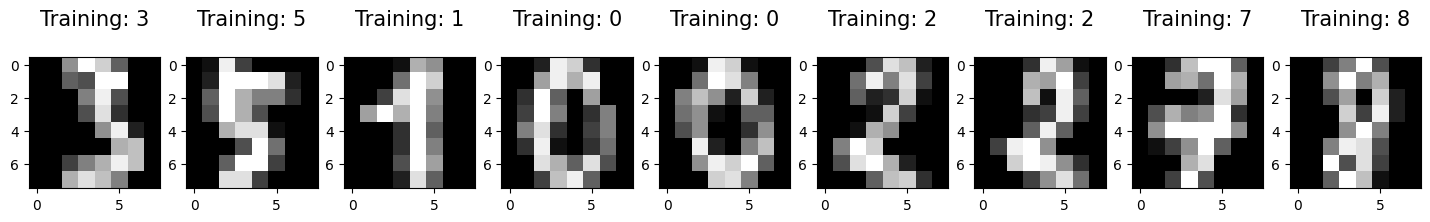

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[45:54], digits.target[45:54])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=15)

데이터를 통해서 해당 데이터가 그림에 해당하는 숫자값을 부여하는 머신러닝을 필요로 한다는 것을 알 수 있다.

### 훈련과 테스트 데이터셋 분리 및 로지스틱 회귀 모델 생성

In [5]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# 회귀 모델 생성
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()  #로지스틱 회귀 모델의 인스턴스 생성
logisticRegr.fit(x_train,y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/torch_book/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 일부 데이터를 사용한 모델 예측

In [6]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

10개의 이미지 데이터를 사용한 로지스틱 회귀 모델에 대한 예측 결과는 위와 같이 출력된다.

### 전체 데이터를 사용한 모델 예측

In [7]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score) #코드를 실행하면 95.11이라는 예측 결과가 출력된다.

0.9511111111111111


### 혼동 행렬 시각화

위의 성능 측정 결과는 95%로 나쁘지 않다. 그러나 결과를 좀 더 명확하게 확인하고자 혼동 행렬로 표현해보겠다.  
혼동 행렬은 지도 학습에서 테스트 데이터셋에 대한 분류 모델 성능을 설명하는데 자주 사용됩니다. 혼동 행렬을 표현하기 위해 파이썬 패키지 Seaborn을 사용합니다.

In [15]:
# !pip install seaborn

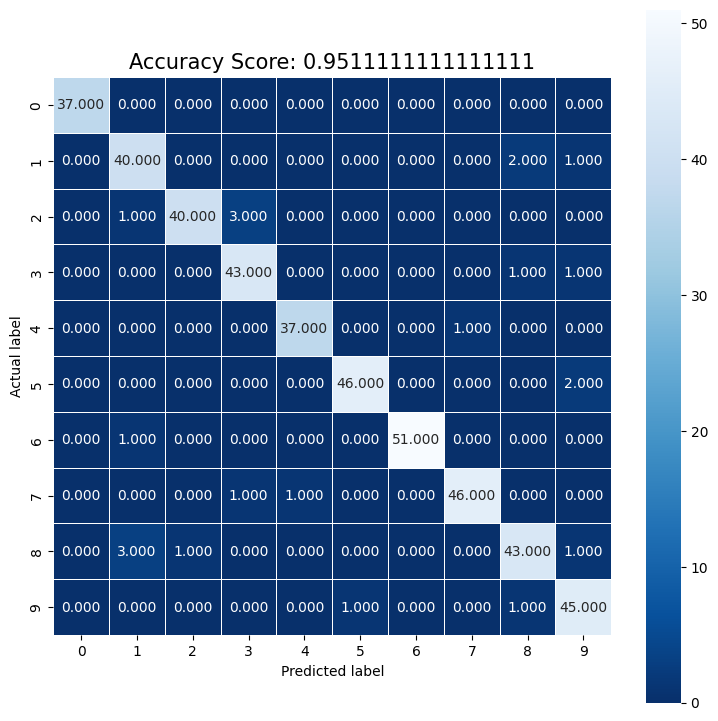

In [14]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)  #혼동 행렬로 만들어줍니다(confusion_matrix 사용)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

결과를 확인하기는 좋지만, 직관적으로 이해하기에는 난해합니다. 따라서 혼동 행렬은 단지 결과 확인용으로 사용하길 권장

## 선형 회귀

* 주어진 데이터에 대한 분류
* 선형 회귀는 주어진 데이터에서 독립 변수(x)와 종속 변수(y)가 선형 관계를 가질 때 사용하면 유용합니다. 또한, 복잡한 연산 과정이 없기 때문에 성능이 낮은 환경에서 사용하면 좋습니다.

선형 회귀는 독립 변수 x를 사용하여 종속 변수 y의 움직임을 예측하고 설명하는데 사용됩니다. 독립 변수 x는 하나일 수도 있고, x1, x2, x3처럼 여러 개일 수도 있습니다. 하나의 x 값으로 y 값을 설명할 수 있다면 단순 선형 회귀하고 하며, x값이 여러 개라면 다중 선형 회귀라고 합니다.  

선형 회귀는 종속 변수와 독립 변수 사이의 관계를 설정하는 데 사용됩니다. 즉, 독립 변수가 변경되었을 때 종속 변수를 추청하는 데 유용합니다. 예를 들어 여름철 아이스크림이 시간당 100개가 팔린다고 할 때 y=100x라는 함수를 가정할 수 있습니다. 이 함수에 따라 아이스트림 가격이 1000원이라고 한다면 시간당 10만원의 매출이 될 것입니다. 이와 같이 단순회귀를 사용하면 변수값을 추정할 수 있습니다.  

반면 로지스틱 회귀는 사건의 확률(0 또는 1)을 확인하는 데 사용됩니다. 예를 들어 고객이 A 제품을 구매할지 여부를 확인하고 싶을 때 로지스틱 회귀 분석을 이용합니다.

### 라이브러리 호출 (p.114)

선형 회귀에 대해 코드로 확인해 보겠습니다. 캐글에서 제공하는 날씨 데이터셋을 이용할 것입니다.  
날씨 데이터셋에는 전 세계 여러 기상 관측소에서 매일 기록된 기상 조건 정보가 포함되어 있습니다. 강수량, 강설량, 기온, 풍속 및 그날의 뇌우 들 정보들이 포함되어 있으나, 예제에서는 최대 온도를 예측하기 때문에 최소, 최대 정보만 사용합니다.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### weather.csv 파일 불러오기

In [28]:
dataset = pd.read_csv('/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter3/weather.csv')

### 데이터 간 관계를 시각화로 표현

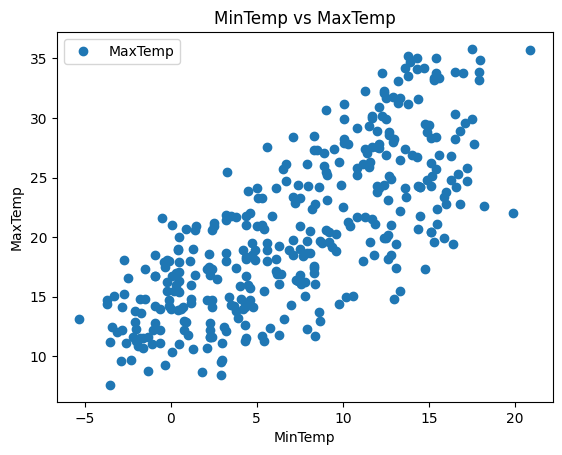

In [32]:
dataset.plot(x='MinTemp', y='MaxTemp',style='o') # 처음에 plot 만들 때는 .plot 이용
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

MinTemp와 MaxTemp 데이터 간 분포르 확인하고자 2D 그래프로 시각화합니다. 두 변수 간에 선형 관계성이 있음을 확인할 수 있습니다.

### 데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성

데이터를 속성과 레이블로 나눕니다. 속성은 독립 변수이고 레이블은 종속 변수입니다. 따라서 MinTemp에 따라 MaxTemp를 예측하기 위해 x 변수는 'MinTemp'로 구성하고, y 변수는 'MaxTemp'로 구성합니다.  
아래와 같이 실행시 선형 모델에 대한 실행 결과가 도출된다.

In [33]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# 데이터의 80%를 훈련 데이터셋으로 하고 데이터의 20%를 검증 데이터셋으로 분할

regressor = LinearRegression() #선형 회귀 클래스를 가져옴
regressor.fit(X_train, y_train) #fit() 메서드를 사용하여 모델 훈련

LinearRegression()

### 회귀 모델에 대한 예측

먼저 X_test의 실제 출력 값을 예측값과 비교해보겠습니다.

In [35]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,25.9,24.340866
1,20.0,15.063014
2,18.9,20.461037
3,19.7,21.979231
4,18.0,24.087834
...,...,...
69,14.1,12.279659
70,20.7,15.400391
71,21.5,24.509554
72,11.3,18.268090


### 테스트 데이터셋을 사용한 회귀선 표현

다음은 테이트 데이터셋을 회귀선으로 표현해보겠습니다. 출력 결과 그림을 보면 회귀선이 실제 데이터와 비슷하다는 것을 확인할 수 있습니다.

<function matplotlib.pyplot.show(close=None, block=None)>

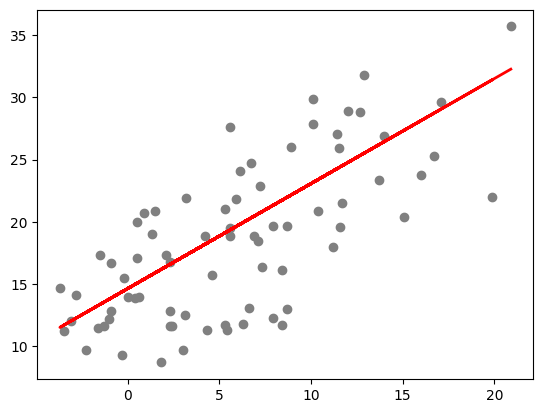

In [37]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show

### 선형 회귀 모델 평가

In [38]:
print('평균제곱법:',metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

평균제곱법: 21.125311642087656
루트 평균제곱법: 4.596227979777293


루트 편균제곱법 값(4.596)은 모든 기온 백분률에 대한 평균값(21.12)과 비교하여 10% 이상임을 알 수 있습니다. 따라서 모델 정확도는 높지 않지만 여전히 합리적으로 좋은 예측을 할 수 있음을 의미합니다.

# 비지도 학습

비지도 학습은 지도 학습처럼 레이블이 필요하지 않으며 정답이 없는 상태에사 훈련시키는 방식입니다. 비지도 학습에는 군집과 차원 축소가 있습니다.   
군집은 각 데이터의 유사성(거리)을 측정한 후 유사성이 높은 데이터끼리 집단으로 분류하는 것입니다. 차원 축소는 차원을 나타내는 특성을 줄여서 데이터를 줄이는 방식입니다. 

## K-평균 군집화

* 주어진 데이터에 대한 군집화
* 주어진 데이터셋을 이용하여 몇 개의 클러스터를 구성할지 사전에 알 수 있을 때 사용하면 유용합니다.

K-평균 군집화는 데이터를 입력받아 소수의 그룹으로 묶는 알고리즘입니다. 레이블이 없는 데이터를 입력받아 각 데이터에 레이블을 할당해서 군집화를 수행하는데, 학습 과정은 다음과 같습니다.  
중심점 선택 -> 클러스터 할당 -> 새로운 중심점 선택 -> 범위 확인  

K-평균 군집화 알고리즘의 성능은 K 값에 따라 달라집니다. 따라서 이번 예제는 적절한 K값을 찾는 것을 목표로 진행해보겠습니다.

### 라이브러리 호출

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 상품에 대한 연 지출 데이터 호출

In [45]:
data = pd.read_csv('/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter3/sales_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


불러온 데이터셋은 도매 유통 업체의 고객 데이터로 신선한 제품, 유제품, 식료품에 대한 연간 지출 정보가 포함되어 있습니다.
* Channel: 고객 채널(호텔/레스토랑/카페) 또는 소매 채널(명목형 데이터)
* Region: 고객 지역(명목형 데이터)
* Fresh: 신선한 제품에 대한 연간 지출(연속형 데이터)
* Milk: 유제품에 대한 연간 지출(연속형 데이터)
* Grocery: 식료품에 대한 연간 지출(연속형 데이터)
* Frozen: 냉동제품에 대한 연간 지출(연속형 데이터)
* Detergents_Paper: 세제 및 종이 제품에 대한 연간 지출(연속형 데이터)
* Delicassen: 조제 식품에 대한 연간 지출(연속형 데이터)

### 연속형 데이터와 명목형 데이터로 분류

In [46]:
categorical_features = ['Channel','Region'] #명목형 데이터
continuous_features = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'] #연속형 데이터

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) #명목형 데이터는 판다스의 get_dummies() 메서드를 사용하여 숫자 0과 1로 변환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


코드를 실행하면 다음과 같이 연속형 데이터와 명목형 데이터로 분류됩니다.

### 데이터 전처리(스케일링 적용)

연속형 데이터의 모든 특성에 동일하게 중요성을 부여하기 위해 스케일링(scaling)을 적용합니다. 이는 데이터 범위가 다르기 때문에 범위에 따라 중요도가 달라질 수 있는 것을 방지하기 위함입니다.   
일정한 범위를 유지하도록 사이킷런의 MinMaxScaler() 메서드를 사용합니다.

In [47]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

### 적당한 K값 추출

/opt/homebrew/Caskroom/miniconda/base/envs/torch_book/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_book/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_book/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/torch_book/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

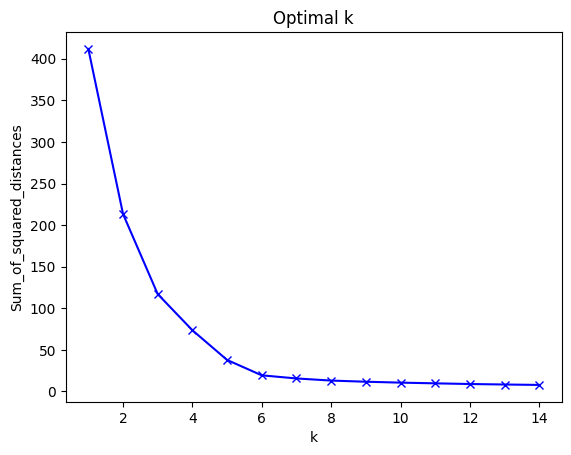

In [51]:
Sum_of_squared_distances = []
K = range(1, 15)  #K에 1부터 14까지 적용해봅니다.
for k in K:
    km = KMeans(n_clusters=k)  #1~14의 K 값 적용
    km = km.fit(data_transformed)  #KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

### 밀도 기반 군집 분석

* 주어진 데이터에 대한 군집화
* K-평균 군집화와는 다르게 사전에 클러스터의 숫자를 알지 못할 때 사용하면 유용합니다. 또한, 주어진 데이터에 이상치가 많이 포함되었을 때 사용하면 좋습니다.

밀도 기반 군집 분석은 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법입니다. 노이즈에 영향을 받지 않으며, K-평균 군집화에 비해 연산량은 많지만 K-평균 군집화가 잘 처리하지 못하는 오목하거나 볼록한 부분을 처리하는데 유용합니다. 밀도 기반 군집 분삭을 이용한 군집 방법은 다음 절차에 따라 진행됩니다.  
1. 엡실론 내 점 개수 확인 및 중심점 결정 : 원 안에 점 P1이 있다고 할 때, 점 P1에서 거리 엡실론 내에 점이 m개 있으면 하나의 군집으로 인식한다고 합시다. 이때 엡실론 내에 점 m개를 가지고 있는 점 P1을 중심점이라고 합니다.
2. 군집 확장 : 1단계에서 새로운 군집을 생성했는데, 주어진 데이터를 사용하여 두 번쨰 군집을 생성해 보겠습니다. 데이터의 밀도 기반으로 군집을 생성하기 때문에 밀도가 높은 지역에서 중심점을 만족하는 데이터가 있다면 그 지역을 포함하여 새로운 군집을 형성합니다.
3. 1,2 단계 반복 : 데이터가 밀집된 밀도가 높은 지역에서 더 이상 중심점을 정의할 수 없을 때까지 1,2 단계를 반복합니다.
4. 노이즈 정의 : 어떤 군집에도 포함되지 않은 데이터를 노이즈로 정의합니다.

## 주성분 분석(PCA)

* 주어진 데이터의 간소화
* 현재 데이터의 특성(변수)이 너무 많을 경우에는 데이터를 하나의 플롯에 시각화해서 살펴보는 것이 어렵습니다. 이때 특성 p개를 두세 개 정도로 압축해서 데이터를 시각화하여 살펴보고 싶을 때 유용한 알고리즘입니다.

변수가 많은 고차원 데이터의 경우 중요하지 않은 변수로 처리해야 할 데이터 양이 많아지고 성능 또한 나빠지는 경향이 있습니다. 이러한 문제를 해결하고자 고차원 데이터를 저차원으로 축소시켜 데이터가 가진 대표 특성만 추출한다면 성능은 좋아지고 작업도 좀 더 간편해집니다. 이때 사용하는 대표적인 알고리즘이 PCA입니다,

### 라이브러리 호출

이번에는 밀도 기반 군집 분석과 PCA 예제를 묶어서 진행해보겠습니다. 밀도 기반 군집 분섣을 이용하여 클러스터링을 진행하겠지만, 시각화를 위해 PCA를 사용해 보겠습니다. 이번 예제의 목표는 정확하게 클러스터링하는 것입니다.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN  #밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA  #데이터 차원 축소

### 데이터 불러오기

In [54]:
X = pd.read_csv('/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter3/credit card.csv')
X

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [55]:
X = X.drop('CUST_ID', axis=1)  #불러온 데이터에서 'CUST_ID'열(칼럼)을 삭제
X.fillna(method='ffill', inplace=True)  #df.fillna(method='ffill')을 실행할 경우 앞 행의 값으로 결측치가 채워짐
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0    40.900749           0.818182      95.40              0.00  \
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0                    95.4      0.000000             0.166667  \
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                    0.000000                          0.083333  \
1                    0.000000                          0.000000   
2                

### 데이터 전처리 및 데이터를 2차원으로 차원 축소

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정

X_normalized = normalize(X_scaled)  #데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized)  #넘파이 배열을 데이터프레임으로 변환

pca = PCA(n_components=2)  #2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized)  #차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_princopal.columns = ['P1','P2']
print(X_principal.head())